In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Descente de gradient : 

In [2]:
def grad_desc(df, x0, mu, eps, maxiter: int = 100000, iters = None):
    """
    mu "est la taille du mouvement"
    """
    x = x0
    for _ in range(maxiter):
        g = df(x)
        if iters is not None:
            iters.append(x.copy())
        if np.linalg.norm(g) < eps:
            break

        else:
            x = x-mu*g
        
    return x


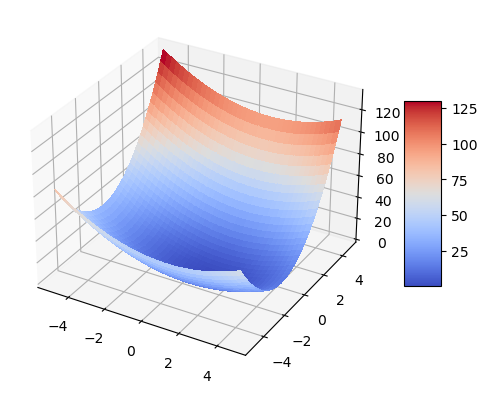

In [3]:
def ftest(x, y):
    return (x - 1) ** 2 + 3*(y + 1)**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ftest(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [4]:
def f_test_grad(x):
    return np.array([2, 6]) @ x+ np.array([-2, 6])

x_min=array([ 5.50011961, -2.49988039]), nombre d'itérations : 100


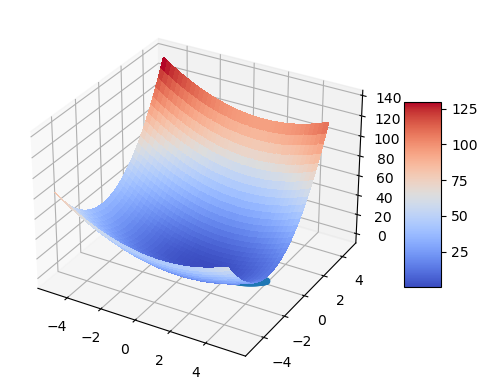

In [5]:
# test de la descente : 
iters = []
x_min = grad_desc(f_test_grad,x0=np.array([0,0]), mu=0.01, eps=10e-8, iters = iters, maxiter=100)
print(f"{x_min=}, nombre d'itérations : {len(iters)}")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = ftest(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plotting iterations
iters_arr = np.array(iters)
ax.scatter3D(iters_arr[:,0], iters_arr[:,1], ftest(iters_arr[:,0], iters_arr[:,1]))

plt.show()

# Application au cas quadratique

Toute matrice symétrique définie positive de taille $2\times 2$ peut s'écrire $\Sigma_{\theta,\sigma_1,\sigma_2}$ avec $\theta\in\mathbb{R}$ et $\sigma_1\in\mathbb{R}_+$ $\sigma_2\in\mathbb{R}_+$

In [6]:
def angle_scalar_to_covmat(theta, sig1, sig2):
    """Returns the only positive definite matrix with those parameters"""
    rotation = np.zeros((2, 2))
    rotation[0, 0] = np.cos(theta)
    rotation[1, 0] = np.sin(theta)
    rotation[0, 1] = -np.sin(theta)
    rotation[1, 1] = np.cos(theta)
    Sigma = rotation.T @ np.array([[sig1, 0.0], [0.0, sig2]]) @ rotation
    return Sigma

def quad_func(theta=0, sig1=1,sig2=1):
    """Returns the function defined by f(x) = 1/2 * x^tAx"""
    Sigma = angle_scalar_to_covmat(theta, sig1, sig2)
    def f(x):
        return x.T @ Sigma @ x / 2
    return f

def quad_grad(x, theta=0, sig1=1, sig2=1):
    """Renvoie le gradient de la fonction x-> 1/2 * x^t*A*x  au point x
     où A est la matrice symétrique définie positive et déterminée par les paramètres theta, sig1, sig2"""
    Sigma = angle_scalar_to_covmat(theta, sig1, sig2)
    return Sigma @ x

On effectue une descente de gradient sur la fonction $f_{\theta, \sigma_1, \sigma_2}$ avec $\theta, \sigma_1, \sigma_2$ donnés

La descente de gradient trouve le minimum en : [0.07270749 0.06455517]


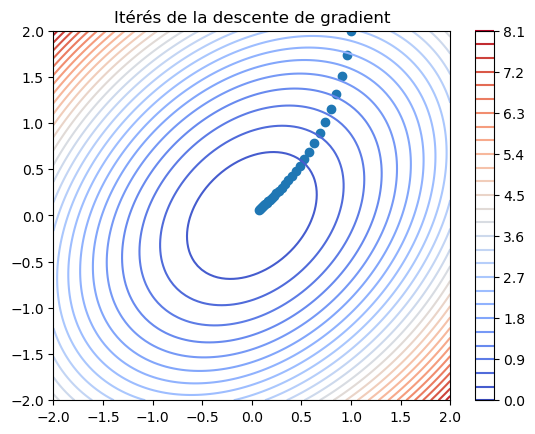

In [7]:
theta, sig1, sig2 = 4, 2, 1

f = quad_func(theta, sig1, sig2)

x0 = np.array([1, 2])
iters = []
x_min = grad_desc(lambda x: quad_grad(x, theta, sig1, sig2), x0,
          mu=0.1, eps=0.1,iters=iters)

print(f"La descente de gradient trouve le minimum en : {x_min}")

# Tracage des itérés et des lignes de niveaux
x = np.linspace(-2,2, 100)
y = np.linspace(-2,2, 100)
X,Y = np.meshgrid(x,y)

# construction de Z :
Z = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j] = f(np.array([x[i],y[j]]))

plt.contour(X,Y,Z, levels=30, cmap = 'coolwarm')
plt.colorbar()


iters_arr = np.array(iters)
plt.scatter(iters_arr[:,0], iters_arr[:,1])
plt.title("Itérés de la descente de gradient")
plt.show()


# Descente par coordonnée
On note $e_1,\ \dots, e_d$ la base canonique de $\mathbb{R}^n$

200 itérations


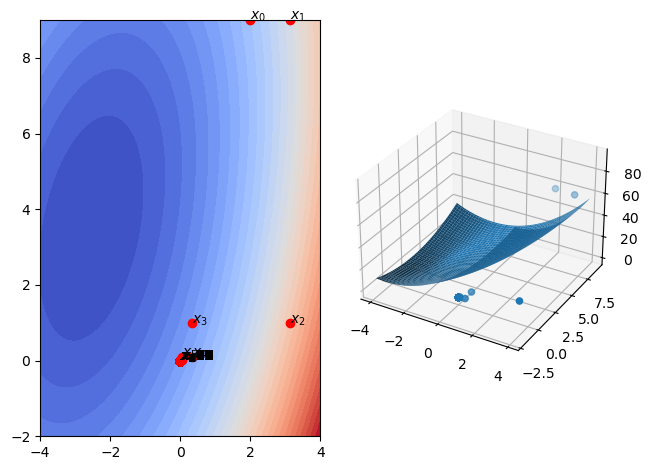

In [8]:
# descente de coordonnée exacte
from scipy.optimize import minimize

def descent_coord(f, x_0, maxiter = 5000, eps = 10e-8, iters = None):
    x = x_0
    d = len(x)

    for k in range(maxiter):
        x_prev = x.copy()
        # print(f"Itération {k}")
        for i in range(d):
            if iters is not None:
                iters.append(x.copy())
            e_i = np.eye(1,d,k=i)[0]
            f_i = lambda t: f(x + t*e_i)
            res = minimize(f_i, x)
            if not res.success :
                raise RuntimeError(f"Can't minimize f_{i}")
            t_min = res.x
            x = x+t_min*e_i
        # if np.linalg.norm(f(x_prev) - f(x)) < eps:
        #     print(f"Stopping at iteration {k}")
        #     break
    return x

iters = []

descent_coord(f, np.array([2,9]), iters=iters, maxiter=100)
print(f'{len(iters)} itérations')

x = np.linspace(-4,4, 100)
y = np.linspace(-2,9, 100)
X,Y = np.meshgrid(x,y)

# construction de Z :
Z = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j] = f(np.array([x[i],y[j]]))

iters_arr = np.array(iters)

fig = plt.figure()

# lignes de niveau

ax1 = fig.add_subplot(1,2,1)
ax1.contourf(X,Y,Z, levels=30, cmap = 'coolwarm')
ax1.scatter(iters_arr[:,0], iters_arr[:,1], color="red")
for i, pt in enumerate(iters_arr):
    ax1.annotate(f"$x_{i}$", (pt))
# plt.colorbar()

# surface 
ax2 = fig.add_subplot(1,2,2, projection="3d")
ax2.plot_surface(X,Y,Z)
ax2.scatter3D(iters_arr[:,0], iters_arr[:,1], np.apply_along_axis(f,1,iters_arr))
# plt.title("Itérés de la descente par coordonnées")
plt.tight_layout()
plt.show()

__C'est quoi ce bordel ?__

# Descente de gradient à pas fixe

In [9]:
def grad_desc_coordinates_constant_step(grad, x_0, gamma, N=100, iters = None):
    """
    Effectue une descente de gradient par coordonnées et à pas fixe.

    grad : la fonction qui à un point donne le gradient en ce point
    gamma : longueur du pas
    N : nombre d'itérations
    """

    x = x_0.copy()
    d = len(x)
    for _ in range(N):
        for i in range(d):
            if iters is not None:
                iters.append(x.copy())
            x = x - gamma * grad(x)[i]

    iters.append(x.copy())
    return x


20001 itérations, x_min=array([ 0.47916667, -0.52083333])


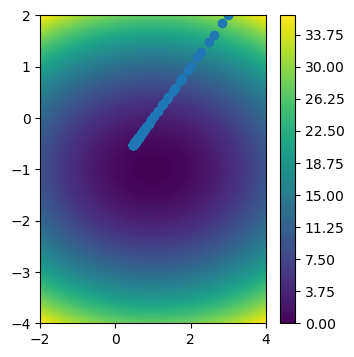

In [10]:
# test avec f_test

x_0 = np.array([3, 2])
gamma = 0.01
iters = []
x_min = grad_desc_coordinates_constant_step(f_test_grad, x_0,gamma, N=10000, iters = iters )

iters_arr = np.array(iters)
print(f"{len(iters_arr)} itérations, {x_min=}")

x = np.linspace(-2,4, 100)
y = np.linspace(-4,2)
X,Y = np.meshgrid(x,y)
Z = ftest(X,Y)

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1,2,1)
im = ax1.contourf(X,Y,Z,300)
ax1.scatter(iters_arr[:,0], iters_arr[:,1])
fig.colorbar(im, ax=ax1)

plt.show()


In [11]:
f_test_grad(np.array([1,-1]))

array([-6,  2])